# Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Data
Variable--Description

Loan_ID          :Unique Loan ID

Gender           :Male/ Female

Married          :Applicant married (Y/N)

Dependents       :Number of dependents

Education        :Applicant Education (Graduate/ Under Graduate)

Self_Employed    :Self employed (Y/N)

ApplicantIncome  :Applicant income

CoapplicantIncome:Coapplicant income

LoanAmount       :Loan amount in thousands

Loan_Amount_Term :Term of loan in months

Credit_History   :credit history meets guidelines

Property_Area    :Urban/ Semi Urban/ Rural

Loan_Status      :Loan approved (Y/N)

# Importing libraries and the data set

In [1]:
#lets first import the libs.
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
#lets import the datasets

#train dataset---
loan_train_dataset = pd.read_csv('loan_train.csv')

#test dataset---
loan_test_dataset = pd.read_csv('loan_test.csv')

# Data Exploration

In [3]:
#lets check both the dataset--

loan_train_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Datatype
loan_train_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Summary of numerical values
loan_train_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Check For  Missing values
loan_train_dataset.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [8]:
col = [col for col in loan_train_dataset.columns if loan_train_dataset[col].count() < loan_train_dataset.shape[0]]
print('Missing values || Columns')
for x in col:
    print(loan_train_dataset.shape[0] - loan_train_dataset[x].count(),'\t\t-->',x)

Missing values || Columns
13 		--> Gender
3 		--> Married
15 		--> Dependents
32 		--> Self_Employed
22 		--> LoanAmount
14 		--> Loan_Amount_Term
50 		--> Credit_History


# Distribution analysis of various Variables

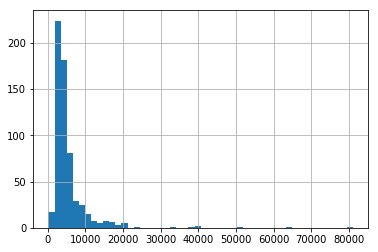

In [9]:
#lets first check the numerical values
loan_train_dataset['ApplicantIncome'].hist(bins=50)

Here we observe that there are few outliers/extreme values .

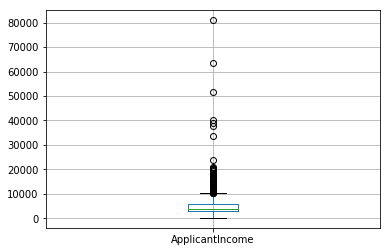

In [10]:
#Boxplot to check the outliers
loan_train_dataset.boxplot(column='ApplicantIncome')

Here we can clearly see the outliers.This can be attributed to the income disparity in the society

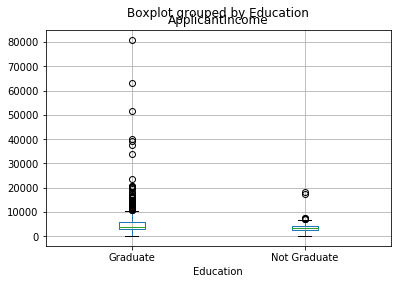

In [11]:
# Let us segregate ApplicantIncome by Education
loan_train_dataset.boxplot(column="ApplicantIncome", by='Education')

As we can see there is no substantial difference between the mean of Graduate and Not Graduate.But there are some outliers in Graduate.

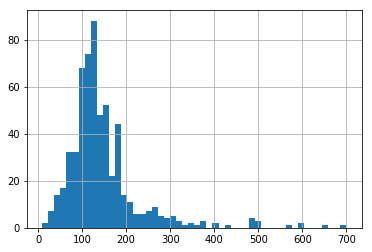

In [12]:
#Loan amount
loan_train_dataset['LoanAmount'].hist(bins=50)

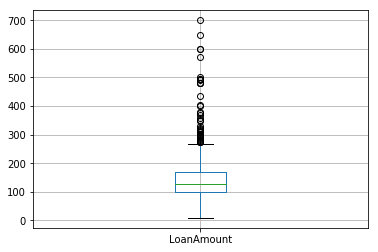

In [13]:
#boxplot of LoanAmount
loan_train_dataset.boxplot(column='LoanAmount')

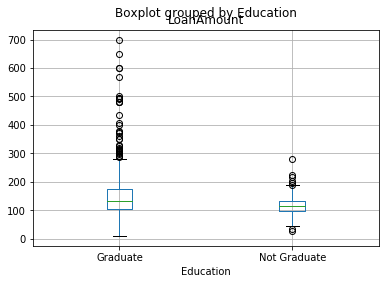

In [14]:
#Lets check LoanAmount with Education
loan_train_dataset.boxplot(column='LoanAmount',by='Education')

So Graduate took more high amount of loan then Not Graduate

# Categorical variable analysis

In [15]:
object_col = [col for col in loan_train_dataset.columns if loan_train_dataset[col].dtypes == 'object']
object_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

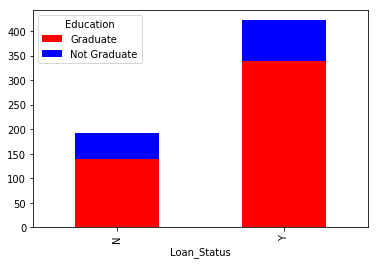

In [16]:
#crosstab on Education and Loan_status 
temp1 = pd.crosstab(loan_train_dataset['Loan_Status'],loan_train_dataset['Education'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

So if you are Graduate then they have more chance to get loan

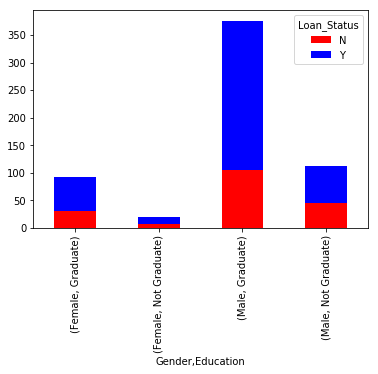

In [17]:
#CrossTable for Gender ,Education a Loan_status
temp1 = pd.crosstab([loan_train_dataset['Gender'],loan_train_dataset['Education']],loan_train_dataset['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

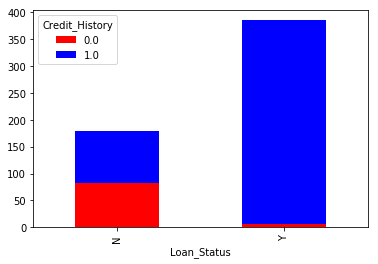

In [18]:
#crosstab on Credict_History and Loan_status 
temp1 = pd.crosstab(loan_train_dataset['Loan_Status'],loan_train_dataset['Credit_History'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

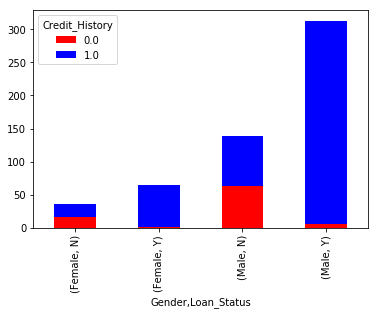

In [19]:
#CrossTable for Gender ,Education a Loan_status
temp1 = pd.crosstab([loan_train_dataset['Gender'],loan_train_dataset['Loan_Status']],loan_train_dataset['Credit_History'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

It seems Credit History has a huge impact for Loan_Status

# Data munging

In [20]:
#Missing values
loan_train_dataset.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#Gender
#Mode Imputation is being use in qualitative attributes 
loan_train_dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [22]:
loan_train_dataset['Gender'].fillna(loan_train_dataset['Gender'].mode()[0],inplace=True)

In [23]:
#Married
loan_train_dataset['Married'].fillna(loan_train_dataset['Married'].mode()[0],inplace= True)

In [24]:
#Dependents
loan_train_dataset['Dependents'].fillna(loan_train_dataset['Dependents'].mode()[0],inplace=True)

In [25]:
#Self_Employed
loan_train_dataset['Self_Employed'].fillna(loan_train_dataset['Self_Employed'].mode()[0],inplace=True)

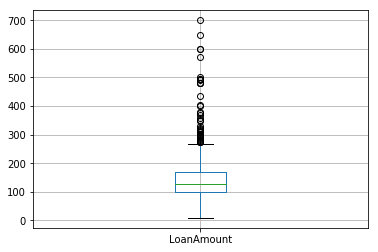

In [26]:
#LoanAmount
loan_train_dataset.boxplot(column='LoanAmount')

The extrime values are possible because some people can apply for huge loan amount.So instead of treating it as a outlier lets apply Log normalization

In [27]:
loan_train_dataset['LoanAmount'].fillna(loan_train_dataset['LoanAmount'].mean(), inplace=True)

In [28]:
loan_train_dataset['LoanAmount_log'] = np.log(loan_train_dataset['LoanAmount'])

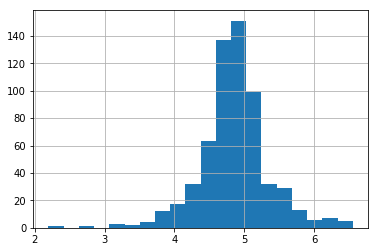

In [29]:
loan_train_dataset['LoanAmount_log'].hist(bins=20)

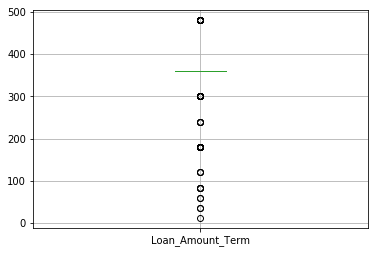

In [30]:
#Loan_Amount_Term
loan_train_dataset.boxplot(column='Loan_Amount_Term')

In [31]:
loan_train_dataset['Loan_Amount_Term'].fillna(loan_train_dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
#Credit_History
loan_train_dataset['Credit_History'].fillna(loan_train_dataset['Credit_History'].mode()[0], inplace=True)

Some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

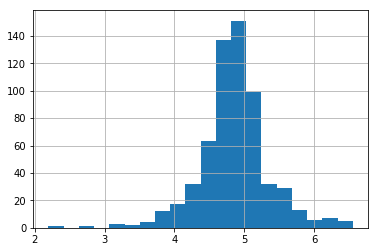

In [33]:
loan_train_dataset['TotalIncome'] = loan_train_dataset['ApplicantIncome'] + loan_train_dataset['CoapplicantIncome']
loan_train_dataset['TotalIncome_log'] = np.log(loan_train_dataset['TotalIncome'])
loan_train_dataset['LoanAmount_log'].hist(bins=20) 

# Building a Predictive Model in Python

Before building the predictive model lets convert the categorical variables to numerical variables

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    loan_train_dataset[i] = le.fit_transform(loan_train_dataset[i])
loan_train_dataset.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [35]:
#lets fixed the missing values in test dataset.
loan_test_dataset.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [36]:
loan_test_dataset['Gender'].fillna(loan_test_dataset['Gender'].mode()[0],inplace=True)
loan_test_dataset['Dependents'].fillna(loan_test_dataset['Dependents'].mode()[0],inplace=True)
loan_test_dataset['Self_Employed'].fillna(loan_test_dataset['Self_Employed'].mode()[0],inplace=True)
loan_test_dataset['LoanAmount'].fillna(loan_test_dataset['LoanAmount'].mode()[0],inplace=True)
loan_test_dataset['Loan_Amount_Term'].fillna(loan_test_dataset['Loan_Amount_Term'].mode()[0],inplace=True)
loan_test_dataset['Credit_History'].fillna(loan_test_dataset['Credit_History'].mode()[0],inplace=True)


In [37]:
loan_test_dataset['ApplicantIncome'].replace(to_replace=0,value=loan_test_dataset['ApplicantIncome'].mode()[0],inplace=True)

In [38]:
loan_test_dataset['CoapplicantIncome'].replace(to_replace=0,value=loan_test_dataset['CoapplicantIncome'].mode()[0],inplace=True)

In [39]:
loan_test_dataset['TotalIncome'] = loan_test_dataset['ApplicantIncome'] + loan_test_dataset['CoapplicantIncome']
loan_test_dataset['TotalIncome_log'] = np.log(loan_test_dataset['TotalIncome'])

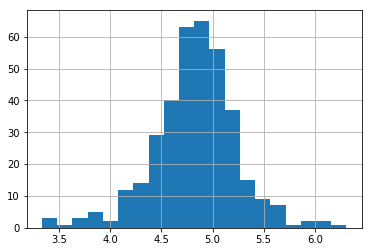

In [40]:
loan_test_dataset['LoanAmount_log'] = np.log(loan_test_dataset['LoanAmount'])
loan_test_dataset['LoanAmount_log'].hist(bins=20)

In [41]:
#lets Encode the char variable
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    loan_test_dataset[i] = le.fit_transform(loan_test_dataset[i])
loan_test_dataset.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
TotalIncome            int64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

In [42]:
#K-fold Cross validation 

In [43]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

C:\Users\Ritsdeo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ritsdeo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
kf = KFold(loan_train_dataset.shape[0],n_folds=5)

In [45]:
target = 'Loan_Status'
predictors  = ['Gender'  ,'Married' ,'Dependents' ,'Education','Self_Employed'
               ,'LoanAmount_log' ,'Loan_Amount_Term',
                  'Credit_History' ,'Property_Area','TotalIncome_log'] 

In [46]:
#Cross-Validation score
data=loan_train_dataset
model = LogisticRegression()
error = []
for train,test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[target].iloc[train]
    model.fit(train_predictors,train_target)
    error.append(model.score(data[predictors].iloc[test,:],data[target].iloc[test]))

print("Cross-Validation Score : %s" % "{0:3%}".format(np.mean(error)))

Cross-Validation Score : 80.946288%


# Model to predict the test data


model = LogisticRegression()

model.fit(loan_train_dataset[predictors],loan_train_dataset[target]) 

predictions = model.predict(data[predictors])

#save the output

output = pd.DataFrame(data={"Loan_ID":loan_test_dataset["Loan_ID"],"Loan_Status":predictions} )

output.to_csv(('sample_submission.csv'),index=False)